# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

# Loading the dataset

#### Here we are loading the crude data set provided to us for preprocessing so as to make it suitable for analysis as well as for feeding any machine learning model.

In [2]:
data=pd.read_csv('cars_engage_2022.csv')

# Exploring the data

In [3]:
data

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


#### Checking if the features (columns) contain any missing values. 'True' implies that the respective column has missing values and 'false' implies that it doesn't.

In [5]:
data.isna().any()

Unnamed: 0           False
Make                  True
Model                False
Variant              False
Ex-Showroom_Price    False
                     ...  
USB_Ports             True
Heads-Up_Display      True
Welcome_Lights        True
Battery               True
Electric_Range        True
Length: 141, dtype: bool

##### Setting the notebook to display all the rows instead of a few in a compressed view for better analysis.

In [6]:

pd.set_option('display.max_rows', None)

##### Checking the data types of all the available features in the crude data. As we can see, there are features like 'Height', 'Width', etc which should have been assigned numerical data-type but are instead assigned 'object' data-type. These features need to be assigned with their correct data-types before we move ahead with further analysis.

In [7]:
data.dtypes

Unnamed: 0                                     int64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     

##### Checking the total number of missing values in each column. By default pandas marks the missing values as 'NaN' which is of float data-type

In [8]:
data.isnull().sum(axis = 0)

Unnamed: 0                                      0
Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4


##### Dropping all those columns which have more than 50 percent missing values since they won't be helpful in maintaining the accuracy of predictive analytics. Even if we fill them with mean or mode of the respective columns, the information will lack accuracy.

In [9]:
 data.drop(['Highway_Mileage', 'ARAI_Certified_Mileage_for_CNG','Front_Track','Rear_Track','Power_Seats','Start_/_Stop_Button','Extended_Warranty','Hill_Assist','3_Point_Seat-Belt_in_Middle_Rear_Seat','Ambient_Lightning','Cargo/Boot_Lights','Drive_Modes','High_Speed_Alert_System','Lane_Watch_Camera/_Side_Mirror_Camera','Passenger_Side_Seat-Belt_Reminder','Voice_Recognition','Walk_Away_Auto_Car_Lock','Compression_Ratio','Other_Specs','Other_specs','Android_Auto','Apple_CarPlay','EBA_(Electronic_Brake_Assist)','Tyre_Pressure_Monitoring_System','iPod_Compatibility','ESP_(Electronic_Stability_Program)','Recommended_Tyre_Pressure','Heated_Seats','ISOFIX_(Child-Seat_Mount)','Rain_Sensing_Wipers','Paddle_Shifters','Leather_Wrapped_Steering','Automatic_Headlamps','Engine_Type','ASR_/_Traction_Control','Cruise_Control','USB_Ports','Heads-Up_Display','Welcome_Lights','Battery','Electric_Range'], axis=1, inplace=True)

In [10]:
data.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,Cooled_Glove_Box,Turbocharger
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.dtypes

Unnamed: 0                                     int64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     

##### Changing the data-types of price and displacement to float values.

In [12]:
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].replace('[\"Rs"\,\.]', '', regex=True).astype(float)

In [13]:
data['Displacement'] = data['Displacement'].replace('[\"cc"\,\.]', '', regex=True).astype(float)

In [14]:
data['Height'] = data['Height'].replace('[\"mm"\,\.]', '', regex=True).astype(float)

In [15]:
data['Length'] = data['Length'].replace('[\"mm"\,\.]', '', regex=True).astype(float)

In [16]:
data['Width'] = data['Width'].replace('[\"mm"\,\.]', '', regex=True).astype(float)

In [17]:
data = data[data.City_Mileage != '12.5-12.7 km/litre']

In [18]:
data['City_Mileage'] = data['City_Mileage'].replace('[\"km/litre"\?\,]', '', regex=True).astype(float)

C:\Users\DHARAN~1\AppData\Local\Temp/ipykernel_1744/3764973114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City_Mileage'] = data['City_Mileage'].replace('[\"km/litre"\?\,]', '', regex=True).astype(float)


In [19]:
data.dtypes

Unnamed: 0                                     int64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                            float64
Displacement                                 float64
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                       float64
Length                                       float64
Width                                        float64
Body_Type                                     

In [20]:
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].replace('[\"litres"\,]', '', regex=True).astype(float)

C:\Users\DHARAN~1\AppData\Local\Temp/ipykernel_1744/2320901712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].replace('[\"litres"\,]', '', regex=True).astype(float)


##### To ignore the warnings hereafter which are not going to hamper the analysis anyways.

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].replace('[\"litres"\,]', '', regex=True).astype(float)

##### Dropping those columns which have some exceptional values which hampers the process of data cleansing.

In [23]:
data = data[data.ARAI_Certified_Mileage != '22.4-21.9 km/litre']

In [24]:
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].replace('[\"km/litre"\"kmpl km/litre"\,]', '', regex=True).astype(float)

In [25]:
data = data[data.Kerb_Weight != '1016-1043 kg']

In [26]:
data = data[data.Kerb_Weight != '1053-1080 kg']

In [27]:
data['Kerb_Weight'] = data['Kerb_Weight'].replace('[\"kg"\,]', '', regex=True).astype(float)

In [28]:
data = data[data.Gears != '7 Dual Clutch']

In [29]:
data = data[data.Gears != 'Single Speed Reduction Gear']

In [30]:
data['Gears'] = data['Gears'].replace('[\"kg"\,]', '', regex=True).astype(float)

In [31]:
data['Ground_Clearance'] = data['Ground_Clearance'].replace('[\"mm"\,]', '', regex=True).astype(float)

In [32]:
data['Wheelbase'] = data['Wheelbase'].replace('[\"mm"\,]', '', regex=True).astype(float)

In [33]:
data = data[data.Boot_Space != '209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded) litres']

In [34]:
data['Boot_Space'] = data['Boot_Space'].replace('[\"litres"\,]', '', regex=True).astype(float)

In [35]:
data['Minimum_Turning_Radius'] = data['Minimum_Turning_Radius'].replace('[\"meter"\,]', '', regex=True).astype(float)

In [36]:
data.dtypes

Unnamed: 0                                     int64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                            float64
Displacement                                 float64
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                           float64
Fuel_Type                                     object
Height                                       float64
Length                                       float64
Width                                        float64
Body_Type                                     

In [37]:
data.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,Cooled_Glove_Box,Turbocharger
0,0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Checking the number of unique values in columns. Correcting typos and invalid entries saves us from the issue arising due to high cardinality as well as the misleading information these typos can generate. 

In [38]:
print(data.Drivetrain.unique())

['RWD (Rear Wheel Drive)' 'FWD (Front Wheel Drive)'
 'AWD (All Wheel Drive)' '4WD' nan]


In [39]:
data['Drivetrain']=data['Drivetrain'].replace('4WD','FWD')

In [40]:
print(data.Cylinder_Configuration.unique())

['In-line' 'V' 'Flat' 'W' nan]


In [41]:
data['Cylinder_Configuration']=data['Cylinder_Configuration'].replace('W','In-line')

### Generating heatmap to check the levels of collinearity among all the numerical variables. 

<AxesSubplot:>

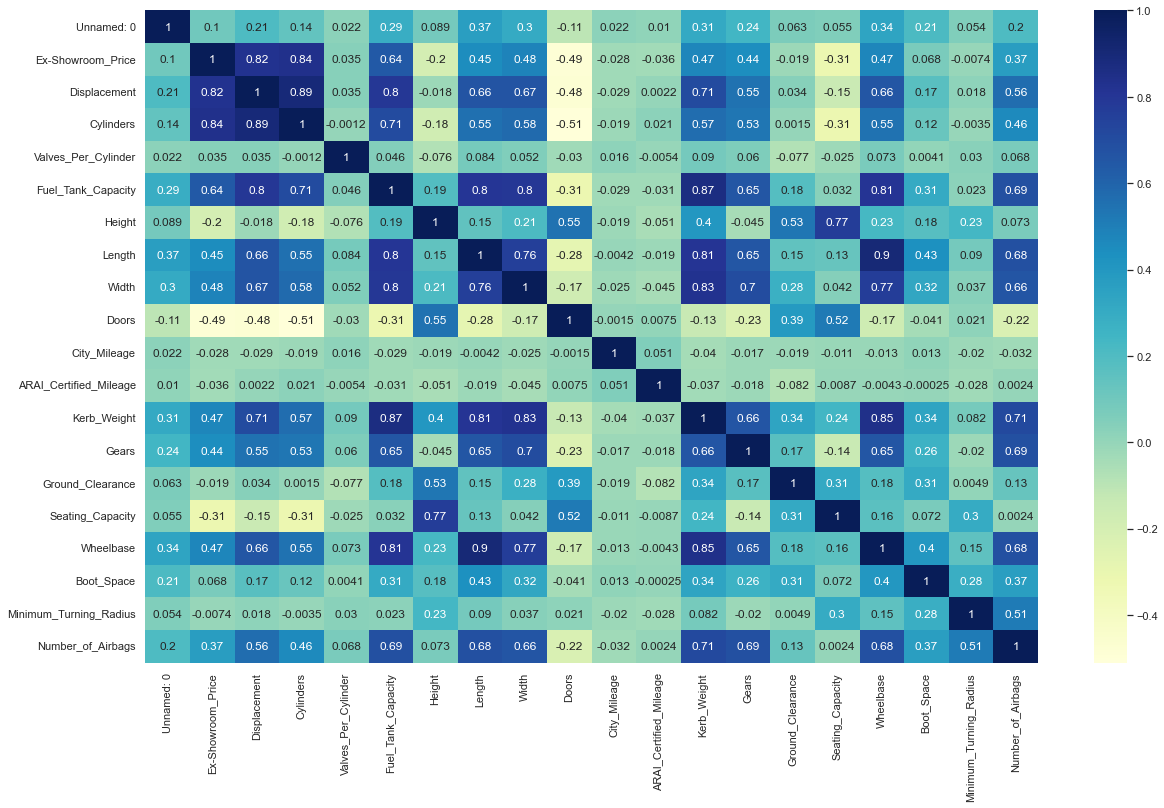

In [42]:
plt.figure(figsize=(20,12))

# Generate the heatmap
seaborn.heatmap(data.corr(),cmap='YlGnBu', annot=True)

##### We can see that both 'Wheelbase' and 'Length' share high levels of collinearity i.e. one of them can be easily calculated from the other. That is why we create a new column 'Length_new' which contains the average of the two columns and then we drop these two columns.

In [43]:
data['Length_new']=data[['Wheelbase', 'Length']].mean(axis=1)
data[['Length_new','Wheelbase', 'Length']].head()

,Length_new,Wheelbase,Length
0,2697.0,2230.0,3164.0
1,2697.0,2230.0,3164.0
2,2697.0,2230.0,3164.0
3,2697.0,2230.0,3164.0
4,2697.0,2230.0,3164.0


In [44]:
data.drop(['Wheelbase', 'Length'], axis =1 , inplace=True)
data.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,Cooled_Glove_Box,Turbocharger,Length_new
0,0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2697.0
1,1,Tata,Nano Genx,Xe,236447.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2697.0
2,2,Tata,Nano Genx,Emax Xm,296661.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2697.0
3,3,Tata,Nano Genx,Xta,334768.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2697.0
4,4,Tata,Nano Genx,Xm,272223.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2697.0


In [45]:
print(data.Emission_Norm.unique())

['BS IV' 'BS 6' nan 'BS III' 'BS VI']


In [46]:
data['Emission_Norm']=data['Emission_Norm'].replace('BS 6','BS VI')

In [47]:
print(data.Engine_Location.unique())

['Rear, Transverse' 'Front, Transverse' 'Front, Longitudinal' nan
 'Rear Mid, Transverse' 'Mid, Longitudinal' 'Mid, Transverse'
 'Rear, Longitudinal']


In [48]:
print(data.Fuel_System.unique())

['Injection' 'PGM - Fi' nan]


In [49]:
print(data.Fuel_Type.unique())

['Petrol' 'CNG' 'Diesel' 'CNG + Petrol' 'Hybrid' 'Electric']


In [50]:
print(data.Body_Type.unique())

['Hatchback' 'MPV' 'MUV' 'SUV' 'Sedan' 'Crossover' nan 'Coupe'
 'Convertible' 'Sports, Hatchback' 'Sedan, Coupe' 'Sports'
 'Crossover, SUV' 'SUV, Crossover' 'Sedan, Crossover'
 'Sports, Convertible' 'Pick-up' 'Coupe, Convertible']


In [51]:
print(data.Rear_Brakes.unique())

['Drum' nan 'Ventilated Disc' 'Solid Disc']


##### Gathering the variables showing very low correlation with the price so that they can be plotted and their relations can be checked. Since these show very low levels of correlation with the price factor and doesn't even matter much in terms of business perspective, we eventually drop them to reduce the levels of multidimensionality.

In [52]:
low_corr=['Height','Minimum_Turning_Radius','Boot_Space','Seating_Capacity','Doors','Valves_Per_Cylinder','Ex-Showroom_Price']

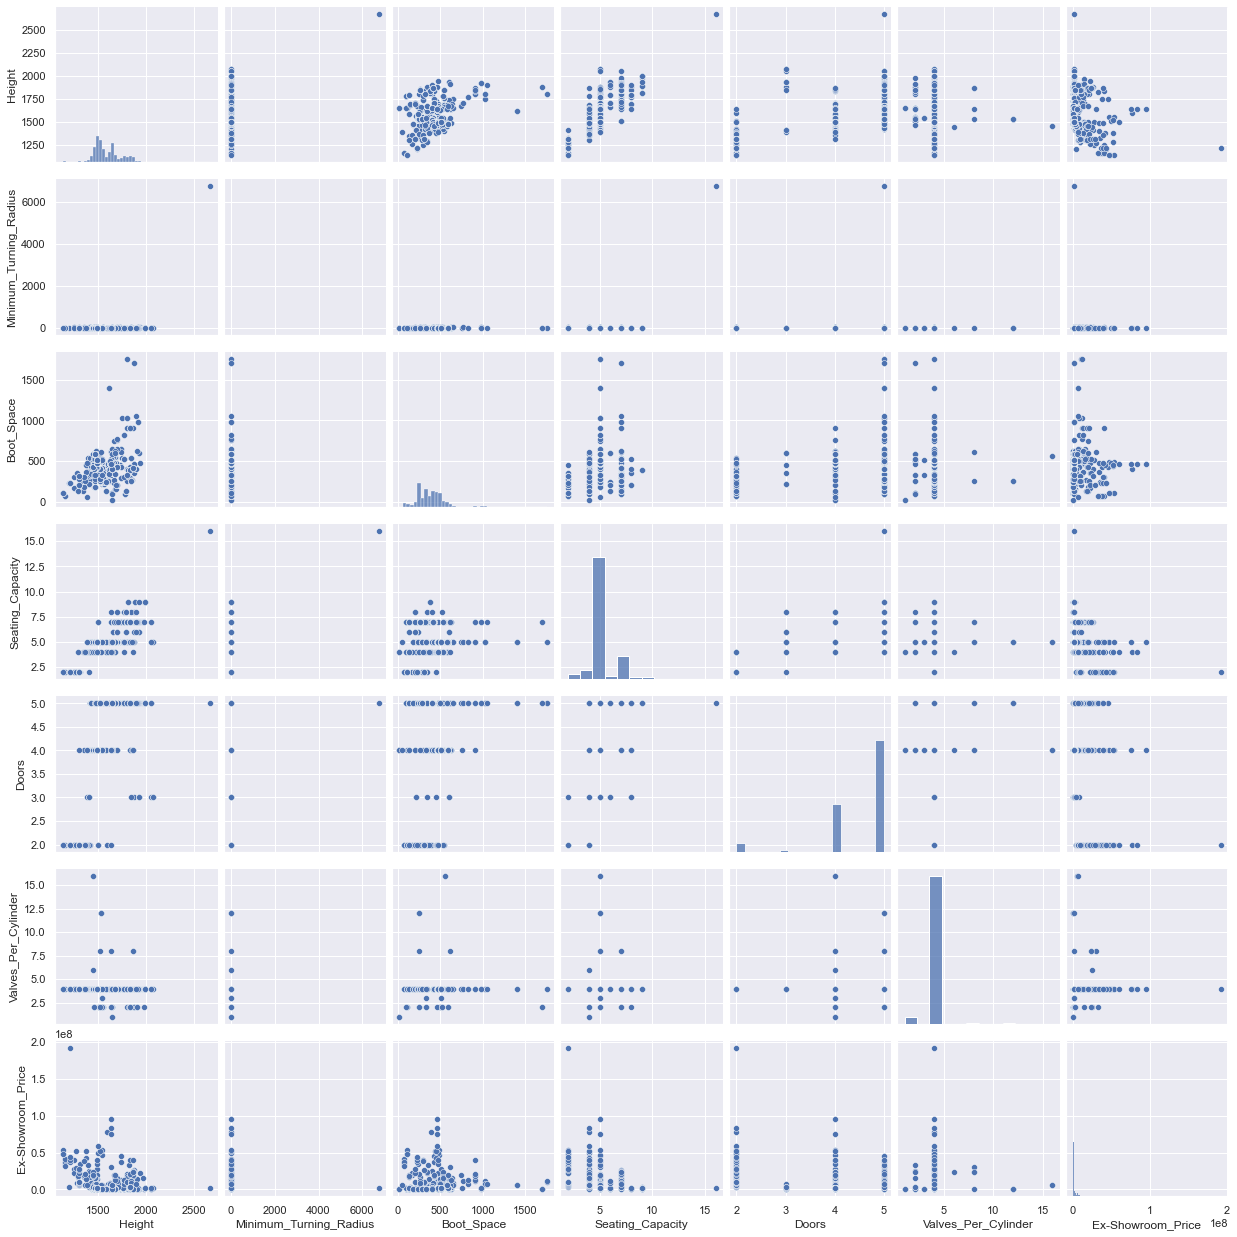

In [53]:
seaborn.pairplot(data[low_corr])

##### Checking the relations of the high correlation factors with the price.

In [54]:
high_corr=['Displacement','Cylinders','Ex-Showroom_Price']

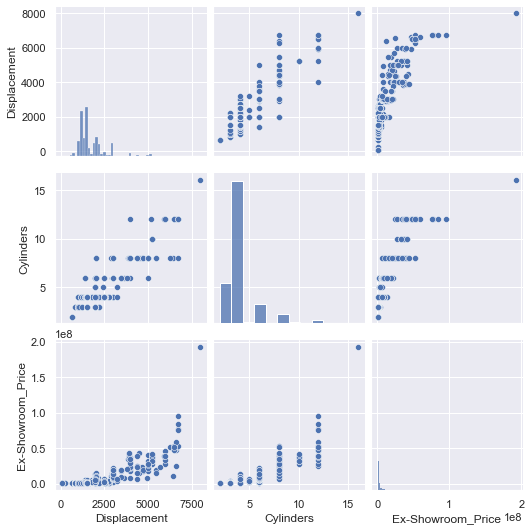

In [55]:
seaborn.pairplot(data[high_corr])

##### Dropping the low correlation variables

In [56]:
data.drop(['Height','Minimum_Turning_Radius','Boot_Space','Seating_Capacity','Doors','Valves_Per_Cylinder'],axis=1,inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1275
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 1251 non-null   int64  
 1   Make                                       1177 non-null   object 
 2   Model                                      1251 non-null   object 
 3   Variant                                    1251 non-null   object 
 4   Ex-Showroom_Price                          1251 non-null   float64
 5   Displacement                               1240 non-null   float64
 6   Cylinders                                  1186 non-null   float64
 7   Drivetrain                                 1244 non-null   object 
 8   Cylinder_Configuration                     1239 non-null   object 
 9   Emission_Norm                              1241 non-null   object 
 10  Engine_Location         

In [58]:
correlation=data["Ground_Clearance"].corr(data["Ex-Showroom_Price"])

In [59]:
print(correlation)

-0.01931763739742366


##### Since the correlation of 'Ground Clearance' with price is really low, we drop this column.

In [60]:
data.drop(['Ground_Clearance'],axis=1,inplace=True)

In [61]:
print(data.Make.unique())

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


In [62]:
data['Make']=data['Make'].replace('Land Rover Rover','Land Rover')

##### From the data we can see that 'City_Mileage' and 'ARAI_Certified_Mileage' are heavily related to each other. So, instead of keeping the two which would add on to multidimensionality, we drop the columns and instead replace them with one column containing the mean of the two.

In [63]:
data['Average_Mileage']=data[['City_Mileage', 'ARAI_Certified_Mileage']].mean(axis=1)
data[['Average_Mileage','City_Mileage', 'ARAI_Certified_Mileage']].head()

,Average_Mileage,City_Mileage,ARAI_Certified_Mileage
0,23.60,23.6,23.6
1,23.60,23.6,23.6
2,NaN,NaN,NaN
3,22.75,23.6,21.9
4,23.60,23.6,23.6


In [64]:
data.drop(['City_Mileage', 'ARAI_Certified_Mileage'], axis =1 , inplace=True)


In [65]:
data.isnull().sum(axis = 0)

Unnamed: 0                                     0
Make                                          74
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                  11
Cylinders                                     65
Drivetrain                                     7
Cylinder_Configuration                        12
Emission_Norm                                 10
Engine_Location                               43
Fuel_System                                    7
Fuel_Tank_Capacity                            66
Fuel_Type                                      0
Width                                         12
Body_Type                                      6
Kerb_Weight                                  364
Gears                                        105
Front_Brakes                                  25
Rear_Brakes                                   25
Front_Suspension    

##### These two below dropped columns are redundant features as well as has quite high number of missing values

In [66]:
data.drop(['Cigarette_Lighter', 'Cooled_Glove_Box'], axis =1 , inplace=True)


##### Similarly we are also dropping all those columns which have either all invalid entries or are redundant features considering the practical scenario

In [67]:
data.drop([ 'Average_Speed'], axis =1 , inplace=True)


In [68]:
data.drop(['Infotainment_Screen', 'Turbocharger','Rear_Center_Armrest','Second_Row_AC_Vents','Navigation_System'], axis =1 , inplace=True)


In [69]:
data.drop(['Gear_Shift_Reminder', 'Gross_Vehicle_Weight'], axis =1 , inplace=True)


In [70]:
data.drop([ 'Gear_Indicator'], axis =1 , inplace=True)


In [71]:
data.drop([ 'Auto-Dimming_Rear-View_Mirror'], axis =1 , inplace=True)


In [72]:
print(data.Parking_Assistance.unique())

[nan 'Rear sensors' 'Rear sensors with camera'
 'Front and rear sensors with camera' 'Yes'
 'Front & rear sensors with 360 degree view' 'Front sensors, Rear sensors'
 'Rear sensors, Rear sensors with camera' 'Rear sensors, Front sensors'
 'Front and rear sensors with camera, Front & rear sensors with 360 degree view']


In [73]:
data['Parking_Assistance'].value_counts()

Rear sensors with camera                                                         364
Rear sensors                                                                     266
Front and rear sensors with camera                                               180
Front & rear sensors with 360 degree view                                        119
Yes                                                                               15
Rear sensors, Rear sensors with camera                                            13
Front sensors, Rear sensors                                                        5
Front and rear sensors with camera, Front & rear sensors with 360 degree view      2
Rear sensors, Front sensors                                                        1
Name: Parking_Assistance, dtype: int64

##### Many values tagged as unique are basically the same values in reality, so we are grouping them here so as to reduce the cardinality.

In [74]:
data['Parking_Assistance']=data['Parking_Assistance'].replace('Rear sensors with camera','Rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Front and rear sensors with camera','Front and rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Front & rear sensors with 360 degree view','Front and rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Yes','Front and rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Rear sensors, Rear sensors with camera','Rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Front sensors, Rear sensors','Front and rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Front and rear sensors with camera, Front & rear sensors with 360 degree view','Front and rear sensors')
data['Parking_Assistance']=data['Parking_Assistance'].replace('Rear sensors, Front sensors','Front and rear sensors')


In [75]:
data['Parking_Assistance'].value_counts()

Rear sensors              643
Front and rear sensors    322
Name: Parking_Assistance, dtype: int64

In [76]:
data['Tripmeter'].value_counts()

Yes     963
2       196
1        26
1, 2      7
Name: Tripmeter, dtype: int64

In [77]:
data['Tachometer'].value_counts()

Analog                  921
Digital                 110
Yes                     110
Not on offer             70
Analog, Digital          22
Digital, Analog           5
Analog, Not on offer      1
Name: Tachometer, dtype: int64

In [78]:
data['Speedometer'].value_counts()

Analog             960
Digital            109
Yes                 79
Analog, Digital     57
Digital, Analog      2
Name: Speedometer, dtype: int64

In [79]:
data['Odometer'].value_counts()

Digital            1035
Analog               90
Yes                  83
Digital, Analog       1
Name: Odometer, dtype: int64

##### Considering the real world scenario, almost all the modern cars have these features on their dashboard, which again is a compulsory feature in cars. So, having different columns for categories which club together to correlate for the same factor is unnecessary.

In [80]:
data.drop([ 'Speedometer','Odometer','Tachometer','Tripmeter'], axis =1 , inplace=True)


##### To maintain the simplicity of the model and distinctive analysis we are dropping these columns as they have too many unique features and this quite high cardinality.

In [81]:
data.drop([ 'Model','Variant'], axis =1 , inplace=True)


In [82]:
data.drop([ 'Boot-lid_Opener','Wheels_Size'], axis =1 , inplace=True)


In [83]:
data['Audiosystem'].value_counts()

CD Player with USB & Aux-in            425
CD/MP3/DVD Player with USB & Aux-in    369
Not on offer                           211
DVD Player with USB & Aux-in           100
USB & Aux-in                            82
CD/MP3 Player                           18
CD Player with Aux-in                    2
CD Player with USB Only                  1
Name: Audiosystem, dtype: int64

##### All the three columns dropped below come under the same umbrella category of 'Audiosystem'. 

In [84]:
data.drop([ 'CD_/_MP3_/_DVD_Player'], axis =1 , inplace=True)


In [85]:
data.drop([ 'Aux-in_Compatibility','USB_Compatibility'], axis =1 , inplace=True)


In [86]:
data['Audiosystem']=data['Audiosystem'].replace('CD Player with USB & Aux-in','CD/MP3/DVD, USB, Aux-in')
data['Audiosystem']=data['Audiosystem'].replace('CD/MP3/DVD Player with USB & Aux-in','CD/MP3/DVD, USB, Aux-in')
data['Audiosystem']=data['Audiosystem'].replace('DVD Player with USB & Aux-in','CD/MP3/DVD, USB, Aux-in')
data['Audiosystem']=data['Audiosystem'].replace('CD/MP3 Player','CD/MP3/DVD')
data['Audiosystem']=data['Audiosystem'].replace('USB & Aux-in','CD/MP3/DVD, USB, Aux-in')
data['Audiosystem']=data['Audiosystem'].replace('CD Player with Aux-in','CD/MP3/DVD, Aux-in')
data['Audiosystem']=data['Audiosystem'].replace('CD Player with USB Only','CD/MP3/DVD, USB')


In [87]:
data['Audiosystem'].value_counts()

CD/MP3/DVD, USB, Aux-in    976
Not on offer               211
CD/MP3/DVD                  18
CD/MP3/DVD, Aux-in           2
CD/MP3/DVD, USB              1
Name: Audiosystem, dtype: int64

##### Dropping all those columns which have only one unique feature and thus in no way contribute towards creating variations in customer segments and thus are unnecessary for further analysis. 

In [88]:
data['Bluetooth'].value_counts()

Yes    962
Name: Bluetooth, dtype: int64

In [89]:
data.drop([ 'Bluetooth'], axis =1 , inplace=True)


In [90]:
data.drop([ 'Torque'], axis =1 , inplace=True)


In [91]:
data['Door_Pockets'].value_counts()

Front & Rear           687
Front                  296
Yes                    144
Front, Front & Rear      8
Name: Door_Pockets, dtype: int64

In [92]:
data['Sun_Visor'].value_counts()

Driver & Front Passenger    1152
Driver Only                   23
Co-Driver Only                15
Name: Sun_Visor, dtype: int64

In [93]:
data['Instrument_Console'].value_counts()

Analog + Digital    996
Analog              168
Digital              74
Name: Instrument_Console, dtype: int64

In [94]:
data['Multifunction_Steering_Wheel'].value_counts()

Multifunction Steering Wheel                             708
Yes                                                      107
Multifunction Steering Wheel, With gear shift paddles     74
With gear shift paddles, Multifunction Steering Wheel      9
With gear shift paddles                                    5
Name: Multifunction_Steering_Wheel, dtype: int64

In [95]:
data['Multifunction_Display'].value_counts()

Yes    1163
Name: Multifunction_Display, dtype: int64

In [96]:
data['Adjustable_Steering_Column'].value_counts()

Rake, Reach    538
Rake           456
Reach, Rake     51
Yes             16
Name: Adjustable_Steering_Column, dtype: int64

In [97]:
data['Key_Off_Reminder'].value_counts()

Yes    924
Name: Key_Off_Reminder, dtype: int64

In [98]:
data['Engine_Immobilizer'].value_counts()

Yes    1192
Name: Engine_Immobilizer, dtype: int64

In [99]:
data['Door_Ajar_Warning'].value_counts()

Yes    1109
Name: Door_Ajar_Warning, dtype: int64

In [100]:
data['EBD_(Electronic_Brake-force_Distribution)'].value_counts()

Yes    1051
Name: EBD_(Electronic_Brake-force_Distribution), dtype: int64

In [101]:
data['ABS_(Anti-lock_Braking_System)'].value_counts()

Yes    1120
Name: ABS_(Anti-lock_Braking_System), dtype: int64

In [102]:
data['Fasten_Seat_Belt_Warning'].value_counts()

Yes    1063
Name: Fasten_Seat_Belt_Warning, dtype: int64

In [103]:
data['Adjustable_Headrests'].value_counts()

All Rows                 680
Front Row                196
Yes                       83
Second Row                36
Front Row, Second Row      6
Second Row, Front Row      1
Name: Adjustable_Headrests, dtype: int64

In [104]:
data['Headlight_Reminder'].value_counts()

Yes          991
Automatic      3
Name: Headlight_Reminder, dtype: int64

In [105]:
data['Seat_Back_Pockets'].value_counts()

Yes    820
Name: Seat_Back_Pockets, dtype: int64

##### Dropping all those columns which don't contribute to variations since these features are found in all modern cars these days.

###### Feature like 'Sun_Visor' is present in all cars, while 'Cup_Holders' are something which are inbuilt in all cars manufactured after 1950s. Similarly, features like 'engine immobilizer', etc are something which have been made a compulsory feature in almost all modern cars.

In [106]:
data.drop([ 'Door_Pockets','Sun_Visor','Cup_Holders','Multifunction_Display','Key_Off_Reminder','Adjustable_Steering_Column','Engine_Immobilizer','Door_Ajar_Warning','EBD_(Electronic_Brake-force_Distribution)','ABS_(Anti-lock_Braking_System)','Fasten_Seat_Belt_Warning','Headlight_Reminder','Seat_Back_Pockets'], axis =1 , inplace=True)

In [107]:
data.drop([ 'Multifunction_Steering_Wheel'], axis =1 , inplace=True)


In [108]:
data.drop([ 'Average_Fuel_Consumption'], axis =1 , inplace=True)


In [109]:
data['Fuel_Gauge'].value_counts()

Digital            707
Analog             421
Yes                 81
Digital, Analog      3
Analog, Digital      1
Name: Fuel_Gauge, dtype: int64

In [110]:
data['Clock'].value_counts()

Digital            1034
Analog               41
Yes                  39
Digital, Analog       4
Name: Clock, dtype: int64

In [111]:
data['Clock']=data['Clock'].replace('Yes','Digital')
data['Clock']=data['Clock'].replace('Digital, Analog','Digital')


In [112]:
data['Child_Safety_Locks'].value_counts()

Yes    1180
Name: Child_Safety_Locks, dtype: int64

In [113]:
data['Handbrake'].value_counts()

Manual       892
Automatic    302
Name: Handbrake, dtype: int64

In [114]:
data['Low_Fuel_Warning'].value_counts()

Yes    1216
Name: Low_Fuel_Warning, dtype: int64

In [115]:
data['FM_Radio'].value_counts()

Yes    1007
Name: FM_Radio, dtype: int64

In [116]:
data['Engine_Malfunction_Light'].value_counts()

Yes    1135
Name: Engine_Malfunction_Light, dtype: int64

In [117]:
data['Central_Locking'].value_counts()

Yes    1105
Name: Central_Locking, dtype: int64

In [118]:
data['Distance_to_Empty'].value_counts()

Yes    1009
Name: Distance_to_Empty, dtype: int64

In [119]:
data['12v_Power_Outlet'].value_counts()

Yes    871
2      125
1       58
3       38
4        6
Name: 12v_Power_Outlet, dtype: int64

In [120]:
data['12v_Power_Outlet']=data['12v_Power_Outlet'].replace('Yes','2')


In [121]:
data['12v_Power_Outlet'] = data['12v_Power_Outlet'].replace('[\"mm"\,\.]', '', regex=True).astype(float)

In [122]:
data.drop([ 'Adjustable_Headrests','Fuel_Gauge','Child_Safety_Locks','Low_Fuel_Warning','FM_Radio','Engine_Malfunction_Light','Central_Locking','Distance_to_Empty'], axis =1 , inplace=True)


In [123]:
data.isnull().sum(axis = 0)

Unnamed: 0                  0
Make                       74
Ex-Showroom_Price           0
Displacement               11
Cylinders                  65
Drivetrain                  7
Cylinder_Configuration     12
Emission_Norm              10
Engine_Location            43
Fuel_System                 7
Fuel_Tank_Capacity         66
Fuel_Type                   0
Width                      12
Body_Type                   6
Kerb_Weight               364
Gears                     105
Front_Brakes               25
Rear_Brakes                25
Front_Suspension           59
Rear_Suspension            46
Front_Tyre_&_Rim           48
Rear_Tyre_&_Rim            47
Power_Steering             56
Power_Windows              96
Keyless_Entry             273
Power                       0
Seats_Material             11
Type                        1
12v_Power_Outlet          153
Audiosystem                43
Basic_Warranty            435
Clock                     133
Fuel-lid_Opener            13
Handbrake 

In [124]:
data['Keyless_Entry'].value_counts()

Smart Key            452
Remote               402
Yes                  103
Remote, Smart Key     20
Smart Key, Remote      1
Name: Keyless_Entry, dtype: int64

In [125]:
data['Keyless_Entry']=data['Keyless_Entry'].replace('Yes','Remote')
data['Keyless_Entry']=data['Keyless_Entry'].replace('Remote, Smart Key','Both')
data['Keyless_Entry']=data['Keyless_Entry'].replace('Smart Key, Remote','Both')


In [126]:
data['Type'].value_counts()

Manual       706
Automatic    516
AMT           18
DCT            7
CVT            3
Name: Type, dtype: int64

In [127]:
data['Type']=data['Type'].replace('AMT','Automatic')
data['Type']=data['Type'].replace('DCT','Automatic')
data['Type']=data['Type'].replace('CVT','Automatic')


In [128]:
data['Seats_Material'].value_counts()

Fabric          720
Leather         507
Vinyl             9
Polyurethene      4
Name: Seats_Material, dtype: int64

In [129]:
data['Power_Windows'].value_counts()

All Windows           1013
Only Front Windows     142
Name: Power_Windows, dtype: int64

In [130]:
data['Power_Steering'].value_counts()

Electric Power                     900
Electro-Hydraulic                  137
Yes                                 85
Hydraulic Power                     72
Electric Power, Hydraulic Power      1
Name: Power_Steering, dtype: int64

In [131]:
data['Power_Steering']=data['Power_Steering'].replace('Yes','Electric Power')
data['Power_Steering']=data['Power_Steering'].replace('Electric Power, Hydraulic Power','Electro-Hydraulic')


In [132]:
data['Seat_Height_Adjustment'].value_counts()

Manual Adjustment                  519
Electric Adjustment with Memory    237
Electric Adjustment                167
Semi Automatic Adjustment           14
Name: Seat_Height_Adjustment, dtype: int64

In [133]:
data['Front_Brakes'].value_counts()

Ventilated Disc    1142
Solid Disc           74
Drum                 10
Name: Front_Brakes, dtype: int64

In [134]:
data['Rear_Brakes'].value_counts()

Drum               761
Ventilated Disc    421
Solid Disc          44
Name: Rear_Brakes, dtype: int64

In [135]:
data['Cylinder_Configuration'].value_counts()

In-line    1060
V           175
Flat          4
Name: Cylinder_Configuration, dtype: int64

In [136]:
data.dtypes

Unnamed: 0                  int64
Make                       object
Ex-Showroom_Price         float64
Displacement              float64
Cylinders                 float64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Engine_Location            object
Fuel_System                object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Width                     float64
Body_Type                  object
Kerb_Weight               float64
Gears                     float64
Front_Brakes               object
Rear_Brakes                object
Front_Suspension           object
Rear_Suspension            object
Front_Tyre_&_Rim           object
Rear_Tyre_&_Rim            object
Power_Steering             object
Power_Windows              object
Keyless_Entry              object
Power                      object
Seats_Material             object
Type                       object
12v_Power_Outlet          float64
Audiosystem   

# Treatment of missing values

## Filling all the missing values in numerical variables with the mean of the respective columns.

In [137]:
data['Displacement'] = data['Displacement'].fillna(data['Displacement'].mean())
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].mean())
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].fillna(data['Fuel_Tank_Capacity'].mean())
data['Width'] = data['Width'].fillna(data['Width'].mean())
data['Kerb_Weight'] = data['Kerb_Weight'].fillna(data['Kerb_Weight'].mean())
data['Gears'] = data['Gears'].fillna(data['Gears'].mean())
data['12v_Power_Outlet'] = data['12v_Power_Outlet'].fillna(data['12v_Power_Outlet'].mean())
data['Number_of_Airbags'] = data['Number_of_Airbags'].fillna(data['Number_of_Airbags'].mean())
data['Average_Mileage'] = data['Average_Mileage'].fillna(data['Average_Mileage'].mean())

In [138]:
data.isnull().sum(axis = 0)

Unnamed: 0                  0
Make                       74
Ex-Showroom_Price           0
Displacement                0
Cylinders                   0
Drivetrain                  7
Cylinder_Configuration     12
Emission_Norm              10
Engine_Location            43
Fuel_System                 7
Fuel_Tank_Capacity          0
Fuel_Type                   0
Width                       0
Body_Type                   6
Kerb_Weight                 0
Gears                       0
Front_Brakes               25
Rear_Brakes                25
Front_Suspension           59
Rear_Suspension            46
Front_Tyre_&_Rim           48
Rear_Tyre_&_Rim            47
Power_Steering             56
Power_Windows              96
Keyless_Entry             273
Power                       0
Seats_Material             11
Type                        1
12v_Power_Outlet            0
Audiosystem                43
Basic_Warranty            435
Clock                     133
Fuel-lid_Opener            13
Handbrake 

## Filling all the remaining missing values in categorical variables with the most frequently occurring feature in the respective columns.

In [139]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [140]:
data.head()

,Unnamed: 0,Make,Ex-Showroom_Price,Displacement,Cylinders,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,...,Handbrake,Instrument_Console,Third_Row_AC_Vents,Ventilation_System,Airbags,Number_of_Airbags,Parking_Assistance,Seat_Height_Adjustment,Length_new,Average_Mileage
0,0,Tata,292667.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,Manual,Analog + Digital,Not Applicable,Manual Air conditioning with cooling and heating,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,23.600000
1,1,Tata,236447.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,Manual,Analog + Digital,Not Applicable,Fully automatic climate control,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,23.600000
2,2,Tata,296661.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,Manual,Analog + Digital,Not Applicable,Air Conditioning with cooling only,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,43.919126
3,3,Tata,334768.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,Manual,Analog + Digital,Not Applicable,Manual Air conditioning with cooling and heating,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,22.750000
4,4,Tata,272223.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,...,Manual,Analog + Digital,Not Applicable,Air Conditioning with cooling only,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,23.600000


In [141]:
data.isnull().sum(axis = 0)

Unnamed: 0                0
Make                      0
Ex-Showroom_Price         0
Displacement              0
Cylinders                 0
Drivetrain                0
Cylinder_Configuration    0
Emission_Norm             0
Engine_Location           0
Fuel_System               0
Fuel_Tank_Capacity        0
Fuel_Type                 0
Width                     0
Body_Type                 0
Kerb_Weight               0
Gears                     0
Front_Brakes              0
Rear_Brakes               0
Front_Suspension          0
Rear_Suspension           0
Front_Tyre_&_Rim          0
Rear_Tyre_&_Rim           0
Power_Steering            0
Power_Windows             0
Keyless_Entry             0
Power                     0
Seats_Material            0
Type                      0
12v_Power_Outlet          0
Audiosystem               0
Basic_Warranty            0
Clock                     0
Fuel-lid_Opener           0
Handbrake                 0
Instrument_Console        0
Third_Row_AC_Vents  

In [142]:
data.describe()

,Unnamed: 0,Ex-Showroom_Price,Displacement,Cylinders,Fuel_Tank_Capacity,Width,Kerb_Weight,Gears,12v_Power_Outlet,Number_of_Airbags,Length_new,Average_Mileage
count,1251.000000,1.251000e+03,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,639.936051,4.440676e+06,1856.765323,4.370152,52.285992,1790.940274,1391.388952,5.891798,1.992714,3.807520,3475.446443,43.919126
std,368.044911,1.060184e+07,1043.064634,1.584046,16.117501,142.349878,411.523175,1.130870,0.309763,2.389245,341.834345,383.562317
min,0.000000,2.364470e+05,72.000000,2.000000,15.000000,1312.000000,660.000000,4.000000,1.000000,1.000000,1562.000000,3.000000
25%,325.500000,7.437520e+05,1198.000000,4.000000,41.000000,1695.000000,1105.000000,5.000000,2.000000,2.000000,3222.500000,15.100000
50%,640.000000,1.083000e+06,1497.000000,4.000000,50.000000,1777.000000,1391.388952,5.891798,2.000000,2.000000,3484.500000,18.300000
75%,961.500000,2.993900e+06,1998.000000,4.000000,60.000000,1853.000000,1562.000000,6.000000,2.000000,6.000000,3672.500000,22.100000
max,1275.000000,1.921429e+08,7993.000000,16.000000,105.000000,2226.000000,2962.000000,9.000000,4.000000,14.000000,4988.000000,13029.160000


### Finally exporting the processed data so that it can be used in further steps of data visualization and model preparation.

In [143]:
data.to_csv('processed_data.csv')